# Keras 基础 

## 数据表示

In [1]:
import numpy as np

### 标量（0D张量）

In [2]:
x = np.array(12)
print(x)
print(x.ndim)

12
0


### 向量（1D张量）

In [3]:
x = np.array([12, 3, 6, 14, 7])
print(x)
print(x.ndim)

[12  3  6 14  7]
1


### 矩阵（2D张量）

In [4]:
x = np.array([[5, 78, 2, 34, 0], [6, 79, 3, 35, 1], [7, 80, 4, 36, 2]])
print(x)
print(x.ndim)

[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]]
2


### 3D 张量与更高维张量

In [5]:
x = np.array([[[5, 78, 2, 34, 0],
                [6, 79, 3, 35, 1],
                [7, 80, 4, 36, 2]],
                [[5, 78, 2, 34, 0],
                [6, 79, 3, 35, 1],
                [7, 80, 4, 36, 2]],
                [[5, 78, 2, 34, 0],
                [6, 79, 3, 35, 1],
                [7, 80, 4, 36, 2]]])
print(x)
print(x.ndim)

[[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]]
3


### 关键属性

In [6]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [7]:
# 轴的个数（阶）
print(train_images.ndim)
# 形状
print(train_images.shape)
# 数据类型
print(train_images.dtype)

3
(60000, 28, 28)
uint8


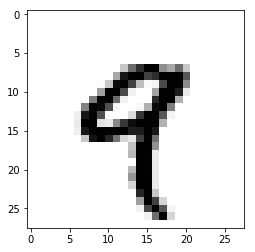

In [8]:
digit = train_images[4]

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## 在 Numpy 中操作张量

### 张量切片 

In [9]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [10]:
# 等同于以下操作
my_slice = train_images[10:100, :, :]
print(my_slice.shape)
my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

(90, 28, 28)
(90, 28, 28)


(60000, 14, 14)


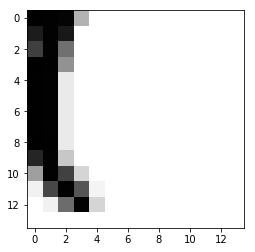

In [12]:
# 其他轴切片
my_slice = train_images[:, 14:, 14:]
print(my_slice.shape)
digit = my_slice[4]

%matplotlib inline
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

(60000, 14, 14)


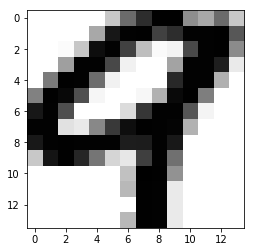

In [13]:
# 其他轴切片
my_slice = train_images[:, 7:-7, 7:-7]
print(my_slice.shape)
digit = my_slice[4]

%matplotlib inline
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## 张量运算

### 逐元素运算

In [14]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()  # 避免覆盖输入张量
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [15]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [17]:
# 在 Numpy 中可以直接进行下列逐元素运算
import numpy as np

x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

z = x + y
print(z)
z = np.maximum(z, 0.)
print(z)

[5 7 9]
[5. 7. 9.]


### 广播

In [18]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [24]:
import numpy as np

x = np.random.random((5, 4, 3))
print(x.shape)
y = np.random.random(3)
print(y.shape)
z = np.maximum(x, y)
print(z.shape)

(5, 4, 3)
(3,)
(5, 4, 3)


In [26]:
x = np.ones((5, 4, 1))
print(x)
y = np.ones(3)
print(y)
z = np.add(x, y)
print(z)

[[[1.]
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  [1.]]]
[1. 1. 1.]
[[[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]

 [[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]

 [[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]

 [[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]

 [[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]]


### 张量点积

In [27]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [28]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [29]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

In [30]:
import numpy as np

x = np.random.random((5, 3))
print(x.shape)
y = np.random.random((3, 4))
print(y.shape)
z = np.dot(x, y)
print(z.shape)

(5, 3)
(3, 4)
(5, 4)


### 张量变形

In [31]:
import numpy as np

x = np.array([[0., 1.], [2., 3.], [4., 5.]])
print(x.shape)
x = x.reshape((6, -1))
print(x.shape)

(3, 2)
(6, 1)


In [32]:
x = np.transpose(x)
print(x.shape)

(1, 6)
